In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Train shape : {}, Test shape : {}".format(train.shape,test.shape))
train.head()

Train shape : (614, 13), Test shape : (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
## Checking null values
print("Null Values - training")
for col in train.columns:
    print("{} : {}".format(col, len(train[train[col].isna()])))
print()
print("Null Values - testing")
for col in test.columns:
    print("{} : {}".format(col, len(test[test[col].isna()])))

Null Values - training
Loan_ID : 0
Gender : 0
Married : 0
Dependents : 0
Education : 0
Self_Employed : 0
ApplicantIncome : 0
CoapplicantIncome : 0
LoanAmount : 0
Loan_Amount_Term : 0
Credit_History : 0
Property_Area : 0
Loan_Status : 0

Null Values - testing
Loan_ID : 0
Gender : 0
Married : 0
Dependents : 0
Education : 0
Self_Employed : 0
ApplicantIncome : 0
CoapplicantIncome : 0
LoanAmount : 0
Loan_Amount_Term : 0
Credit_History : 0
Property_Area : 0


In [10]:
#check unique values
categorical_columns = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
continuous_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for cat_col in categorical_columns:
    print("{} : {}".format(cat_col,train[cat_col].unique()))

Gender : ['Male' 'Female' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '1' '2' '3+' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
Loan_Amount_Term : [ 360.  120.  240.   nan  180.   60.  300.  480.   36.   84.   12.]
Credit_History : [  1.   0.  nan]
Property_Area : ['Urban' 'Rural' 'Semiurban']


### Visualizations

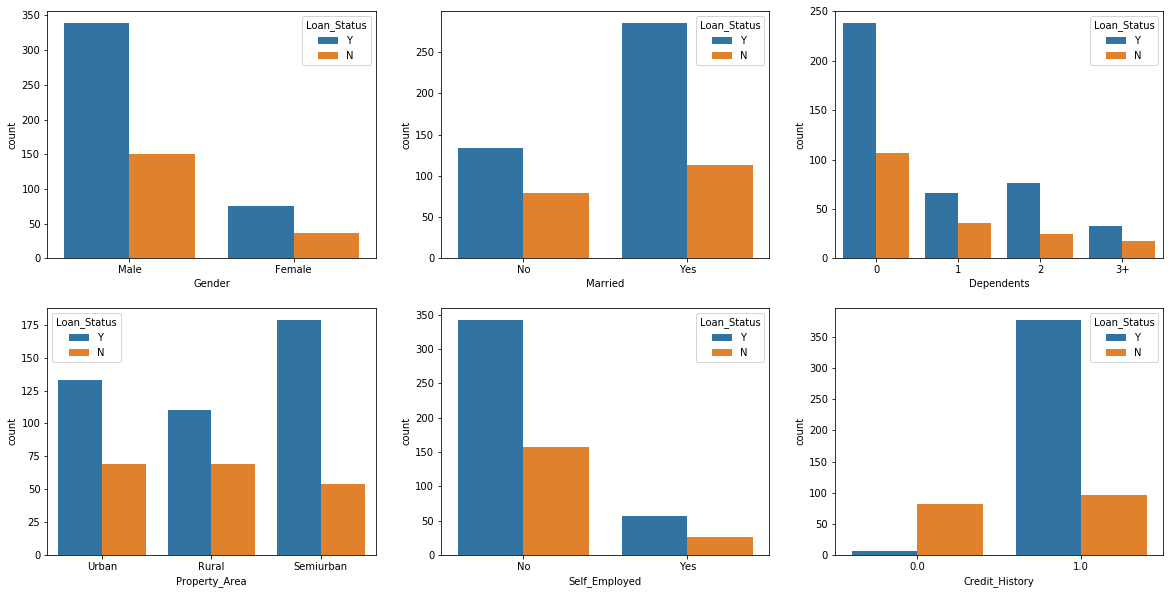

In [19]:
fig,ax = plt.subplots(figsize=(20,10),ncols=3,nrows=2)
#sns.barplot(x="Gender",y="Loan_",hue="Marital_Status",estimator=np.mean,data=df_train,ax=ax[0])
sns.countplot(x="Gender",hue="Loan_Status",data=train,ax=ax[0][0])
sns.countplot(x="Married",hue="Loan_Status",data=train,ax=ax[0][1])
sns.countplot(x="Dependents",hue="Loan_Status",data=train,ax=ax[0][2])
sns.countplot(x="Property_Area",hue="Loan_Status",data=train,ax=ax[1][0])
sns.countplot(x="Self_Employed",hue="Loan_Status",data=train, ax=ax[1][1])
sns.countplot(x="Credit_History",hue="Loan_Status",data=train, ax=ax[1][2])

In [31]:
#there are mostly male applicant lets replace NA with Male - (13,11)
train.Gender.fillna("Male",inplace=True);test.Gender.fillna("Male",inplace=True)

#there are moslty married applicant lets replace them with Married (3,0)
train.Married.fillna("Yes",inplace=True)

#most people dont have dependents (15,10)
train.Dependents.fillna(0,inplace=True);test.Dependents.fillna(0,inplace=True)

#property area, it has no na values

#most people are not self_employed
train.Self_Employed.fillna("No",inplace=True);test.Self_Employed.fillna("No",inplace=True)

#most people have credit history, but NA value (50,29)
train.Credit_History.fillna(-1,inplace=True);test.Credit_History.fillna(-1,inplace=True)

#most people are graduate but it has no NA values

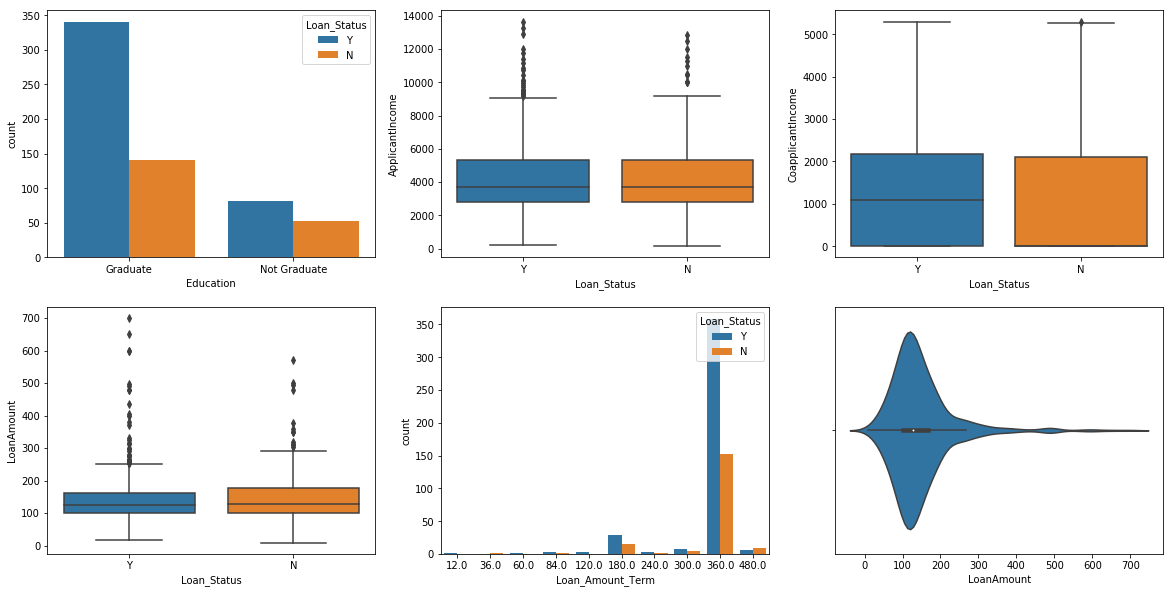

In [55]:
fig,ax = plt.subplots(figsize=(20,10),ncols=3,nrows=2)
sns.countplot(x="Education",hue="Loan_Status",data=train,ax=ax[0][0])

# Loan_Status vs ApplicantIncome
applicantIncome = train.ApplicantIncome[ train.ApplicantIncome < np.percentile(train.ApplicantIncome,95)]
loanStatus = train.Loan_Status[ train.ApplicantIncome < np.percentile(train.ApplicantIncome,95)]
sns.boxplot(x=loanStatus,y=applicantIncome,ax=ax[0][1])

# Loan_Status vs CoapplicantIncome
coapplicantIncome = train.CoapplicantIncome[ train.CoapplicantIncome < np.percentile(train.CoapplicantIncome,96)]
loanStatus = train.Loan_Status[ train.CoapplicantIncome < np.percentile(train.CoapplicantIncome,96)]
sns.boxplot(x=loanStatus,y=coapplicantIncome,ax=ax[0][2])

#Loan_Status vs LoanAmount
sns.boxplot(x="Loan_Status",y="LoanAmount",data=train,ax=ax[1][0])

sns.countplot(x="Loan_Amount_Term",hue="Loan_Status",data=train,ax=ax[1][1])

sns.violinplot("LoanAmount",data=train,ax=ax[1][2])

In [56]:
#Dealing with applicant Income

# replace very high applicant income with 95th percentile
applicantIncome_th = np.percentile(train.ApplicantIncome, 95)
train.loc[ train[train.ApplicantIncome > applicantIncome_th].index, "ApplicantIncome" ] = applicantIncome_th
test.loc[ test[test.ApplicantIncome > applicantIncome_th].index, "ApplicantIncome" ] = applicantIncome_th

In [57]:
#Dealing with co applicant Income

#replace very high co applicant income with 96 percentile
coapplicantIncome_th = np.percentile(train.CoapplicantIncome, 96)
train.loc[ train[train.CoapplicantIncome > coapplicantIncome_th].index, "CoapplicantIncome" ] = coapplicantIncome_th
test.loc[ test[test.CoapplicantIncome > coapplicantIncome_th].index, "CoapplicantIncome" ] = coapplicantIncome_th

In [60]:
#Dealing with loan Amount
loanAmount_mean = np.mean(train.LoanAmount)
train.LoanAmount.fillna(loanAmount_mean,inplace=True)
test.LoanAmount.fillna(loanAmount_mean, inplace=True)

In [61]:
#Dealing with Loan Amount Term (14,6)
train.Loan_Amount_Term.fillna(36.0,inplace=True)
test.Loan_Amount_Term.fillna(36.0,inplace=True)

In [63]:
submission = pd.DataFrame({"Loan_ID":test.Loan_ID})
Y = train.Loan_Status
train.drop(["Loan_ID","Loan_Status"],axis=1,inplace=True)
test.drop(["Loan_ID"],axis=1,inplace=True)

In [69]:
df = train.append(test,sort=False,ignore_index=True)
#some preprocessing
#1. Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Married = le.fit_transform(df.Married)
df.Property_Area = le.fit_transform(df.Property_Area)
df.Self_Employed = le.fit_transform(df.Self_Employed)
df.Education = le.fit_transform(df.Education)

df.Dependents.replace('3+','3',inplace=True)

In [70]:
#2. Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df.ApplicantIncome = mms.fit_transform(df.ApplicantIncome.values.reshape((len(df.ApplicantIncome),1))).reshape((len(df.ApplicantIncome)))
df.CoapplicantIncome = mms.fit_transform(df.CoapplicantIncome.values.reshape((len(df.CoapplicantIncome),1))).reshape((len(df.CoapplicantIncome)))
df.LoanAmount = mms.fit_transform(df.LoanAmount.values.reshape((len(df.LoanAmount),1))).reshape((len(df.LoanAmount)))
df.Loan_Amount_Term = mms.fit_transform(df.Loan_Amount_Term.values.reshape((len(df.Loan_Amount_Term),1))).reshape((len(df.Loan_Amount_Term)))

In [71]:
df.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [72]:
df = df.astype({ 'Dependents':int, 'Credit_History':int})
TargetEncoder = LabelEncoder()
TargetEncoder.fit(Y)
Y = TargetEncoder.transform(Y)

In [75]:
X = df[:614]
X_test = df[614:]
print("Train shape :{}, Test shape : {}, Train Target Length : {}".format(X.shape,X_test.shape,len(Y)))

Train shape :(614, 11), Test shape : (367, 11), Train Target Length : 614


### Models to try
1. Logistic Regression
2. RandomForest
3. Support Vector Classifier
4. XGBoost Classifier

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix
def accuracy(model,x,y):
    y_ = model.predict(x)
    return accuracy_score(y_,y)

In [76]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
def score(clf):
    score = cross_val_score(estimator=clf,X=X,y=Y,scoring=accuracy,n_jobs=-1, 
                            cv=StratifiedKFold(n_splits=3,shuffle=True)).mean()
    return score

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=1.0)
print("Logistic Regression Accuracy : {}".format(score(lr)))

Logistic Regression Accuracy : 0.6775306870715766


In [80]:
from sklearn.svm import SVC
svc = SVC(C=1.0)
print("SVC Accuracy : {}".format(score(svc)))

SVC Accuracy : 0.7704208512673363


In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
print("RFC Accuracy : {}".format(score(rfc)))

RFC Accuracy : 0.7736410011158935


In [84]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50,max_depth=6,learning_rate=0.05)
print("XGB Accuracy : {}".format(score(xgb)))

XGB Accuracy : 0.7801370954886019


#### Lets improve XGB Classifier since it is doing best

In [112]:
from hyperopt import fmin, hp, tpe

def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth':int(params['max_depth']),
        'learning_rate':params['learning_rate'],
        'colsample_bylevel':params['colsample_bylevel'],
        'colsample_bytree':params['colsample_bytree']
    }
    xgb = XGBClassifier(**params,n_jobs=4)
    acc = score(xgb)
    if acc>0.80: print("{}:{}".format(params,acc))
    return -1*acc
    
space = {
    'n_estimators':hp.quniform('n_estimators',20,160,20),
    'max_depth':hp.quniform('max_depth',2,18,4),
    'learning_rate':hp.uniform('learning_rate',0.05,0.2),
    'colsample_bylevel': hp.choice('colsample_bylevel',[0.2,0.4,0.6,1]),
    'colsample_bytree': hp.choice('colsample_bytree',[0.2,0.4,0.6,1])
}
    
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100)

{'n_estimators': 40, 'max_depth': 8, 'learning_rate': 0.13691859807411802, 'colsample_bylevel': 0.4, 'colsample_bytree': 0.2}:0.8062011796588555
{'n_estimators': 40, 'max_depth': 8, 'learning_rate': 0.1404732870806746, 'colsample_bylevel': 0.6, 'colsample_bytree': 0.2}:0.8062011796588555
{'n_estimators': 20, 'max_depth': 4, 'learning_rate': 0.15506404019181932, 'colsample_bylevel': 0.6, 'colsample_bytree': 0.6}:0.804551251394867
{'n_estimators': 20, 'max_depth': 4, 'learning_rate': 0.1361763601349016, 'colsample_bylevel': 0.6, 'colsample_bytree': 0.6}:0.8062011796588555
{'n_estimators': 20, 'max_depth': 4, 'learning_rate': 0.11347458975178237, 'colsample_bylevel': 0.6, 'colsample_bytree': 0.6}:0.8013151602104257
{'n_estimators': 40, 'max_depth': 4, 'learning_rate': 0.10350420566789714, 'colsample_bylevel': 0.4, 'colsample_bytree': 0.6}:0.8029411764705884
{'n_estimators': 20, 'max_depth': 8, 'learning_rate': 0.17064231608416247, 'colsample_bylevel': 1, 'colsample_bytree': 0.2}:0.8013231

In [106]:
best

{'colsample_bylevel': 2,
 'colsample_bytree': 2,
 'learning_rate': 0.0657119209437096,
 'max_depth': 4.0,
 'n_estimators': 120.0}

In [109]:
xgb = XGBClassifier( n_estimators= int(best['n_estimators']),
        max_depth=int(best['max_depth']),
        learning_rate=best['learning_rate'],
        colsample_bylevel=0.6,
        colsample_bytree=0.6
)
xgb.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
       colsample_bytree=0.6, gamma=0, learning_rate=0.0657119209437096,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=120, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [110]:
Y_test = xgb.predict(X_test)
submission['Loan_Status'] = TargetEncoder.inverse_transform(Y_test)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [111]:
submission.to_csv("submission1.csv",index=False)